In [1]:
# https://cellrank.readthedocs.io/en/latest/api/_autosummary/datasets/cellrank.datasets.reprogramming_morris.html

import cellrank as cr
import scanpy as sc

# https://github.com/theislab/cellrank/issues/1183
# pip install git+https://github.com/theislab/cellrank.git@main

sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

In [3]:
adata = cr.datasets.reprogramming_morris(subset="full")

  0%|          | 0.00/1.48G [00:00<?, ?B/s]

In [4]:
adata

AnnData object with n_obs × n_vars = 104679 × 22630
    obs: 'timecourse', 'reprogramming_day', 'reprogramming', 'cell_type', 'cell_cycle', 'cluster', 'monocle_state', 'pseudotime', 'CellTagD0_85k', 'CellTagD3_85k', 'CellTagD13_85k', 'CellTagD0_48k', 'CellTagD3_48k', 'CellTagD13_48k'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'cell_cycle_colors', 'cluster_colors', 'reprogramming_colors', 'reprogramming_day_colors'
    obsm: 'X_diff', 'X_tsne'
    layers: 'spliced', 'unspliced'

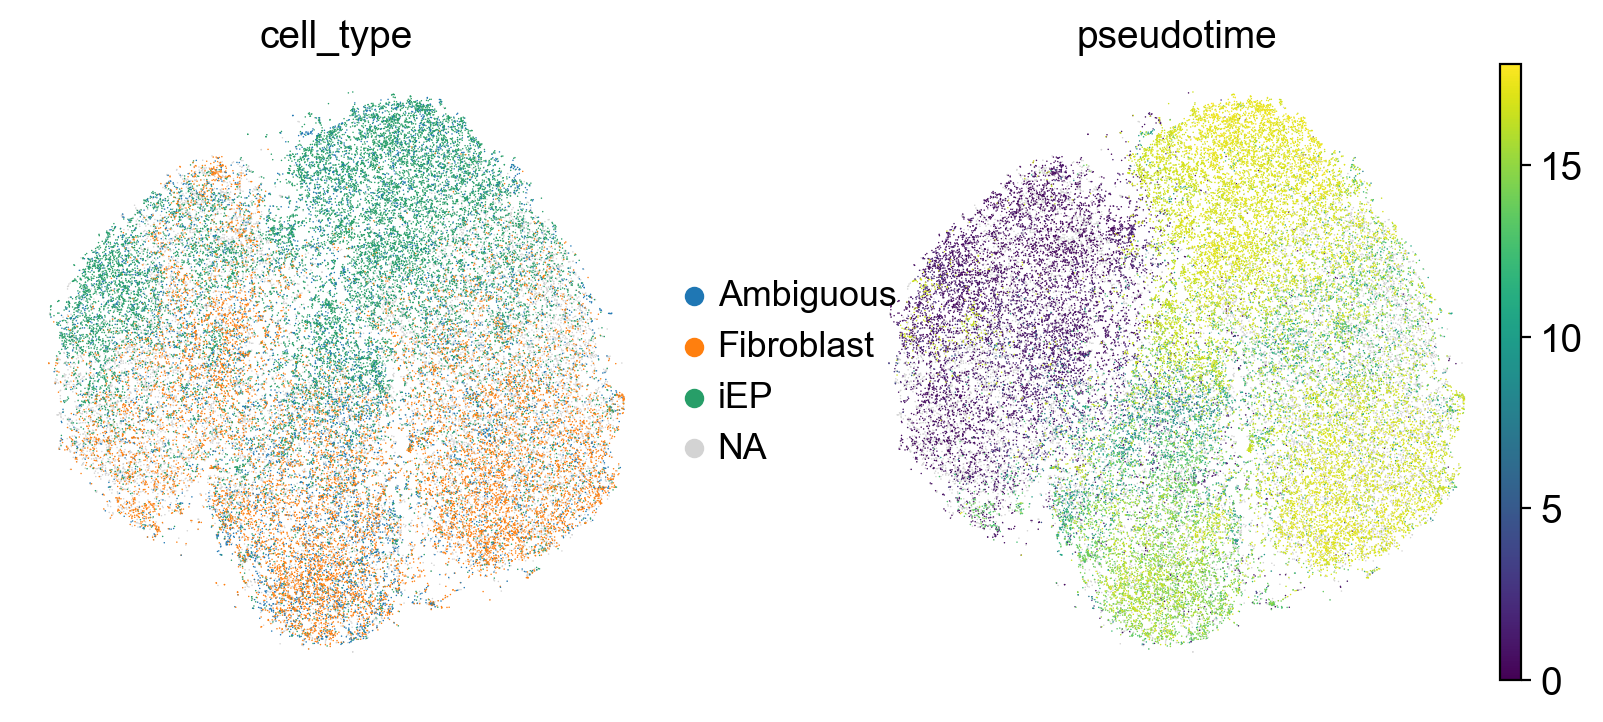

In [5]:
sc.pl.embedding(adata, basis="tsne", color=["cell_type", "pseudotime"])

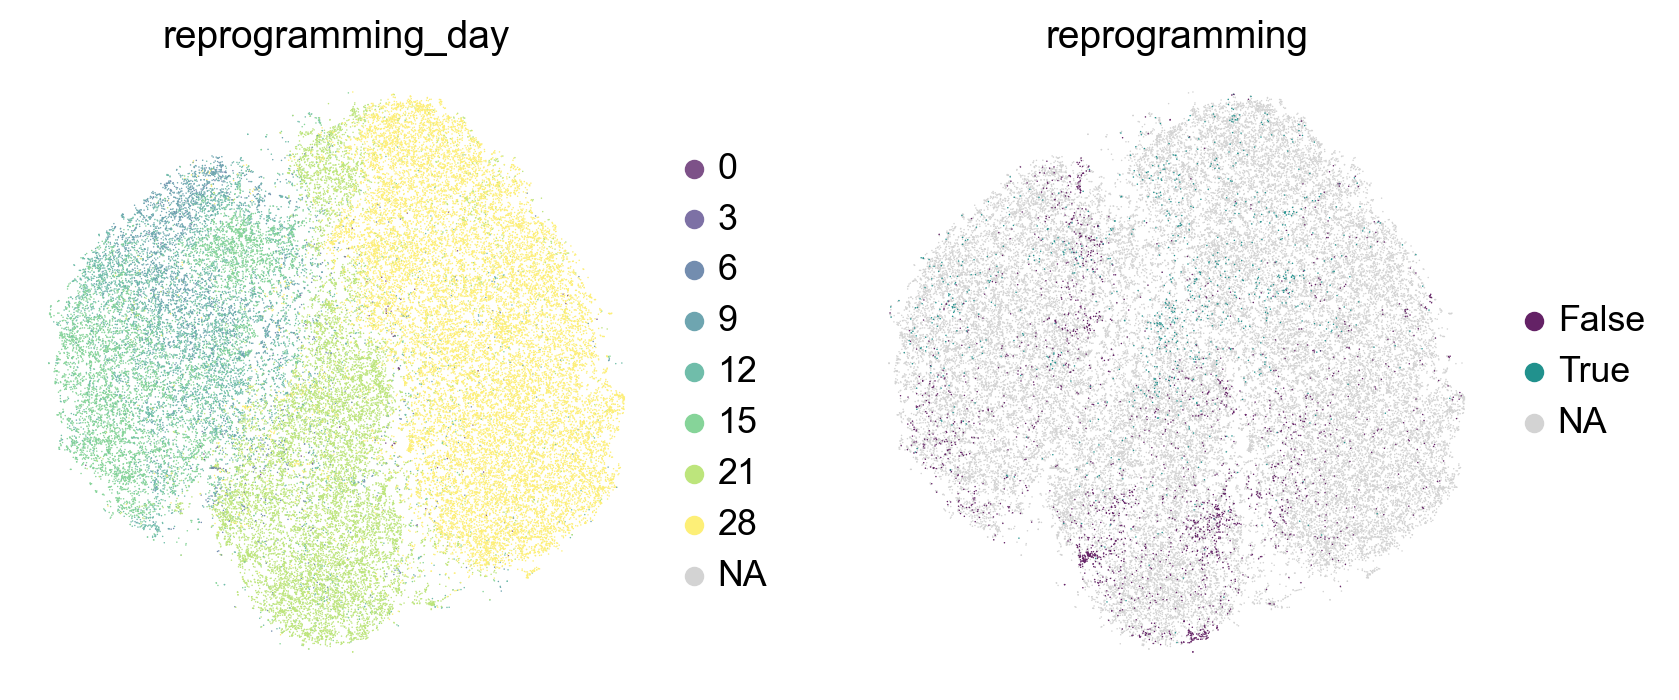

In [6]:
sc.pl.embedding(adata, basis="tsne", color=["reprogramming_day", "reprogramming"])

In [7]:
adata.obs["CellTagD0_48k"]

HF1_AACTCTTAGCTGAACG_1   NaN
HF1_AAACGGGCAACACGCC_1   NaN
HF1_AACTCTTCATGCTGGC_1   NaN
HF1_AACACGTTCCAATGGT_1   NaN
HF1_AACTCAGTCGGCCGAT_1   NaN
                          ..
HF2_TTTGTCAGTACCGGCT_4   NaN
HF2_TTTGTCAGTGTGACGA_4   NaN
HF2_TTTGTCAAGTACTTGC_4   NaN
HF2_TTTGTCAGTAGGACAC_4   NaN
HF2_TTTGTCAGTTCTCATT_4   NaN
Name: CellTagD0_48k, Length: 104679, dtype: float64

In [8]:
adata.obs["CellTagD0_48k"].dropna()

HF1_AAAGCAATCCAGATCA_5     424.0
HF1_AACACGTAGAACAACT_5     195.0
HF1_AAATGCCTCTAACTGG_5     493.0
HF1_AAACCTGAGAGCAATT_5     647.0
HF1_AACACGTTCGAGGTAG_5     487.0
                           ...  
HF2_TTCGGTCCACTGTCGG_4    2454.0
HF2_TTTGGTTGTCGATTGT_4    2874.0
HF2_TTGGAACCAAGAAAGG_4    2764.0
HF2_TTGGCAACAGGGAGAG_4    2599.0
HF2_TTGTAGGGTCAGAGGT_4    2294.0
Name: CellTagD0_48k, Length: 10887, dtype: float64

In [9]:
adata.obs["CellTagD0_48k"].nunique()

540

In [10]:
adata.obs["CellTagD0_48k"].value_counts()

CellTagD0_48k
493.0     1932
2352.0     945
487.0      651
666.0      588
2721.0     341
          ... 
462.0        1
338.0        1
439.0        1
295.0        1
2599.0       1
Name: count, Length: 540, dtype: int64

In [11]:
adata.obs["timecourse"].value_counts()

timecourse
2    54277
1    30733
Name: count, dtype: int64

In [12]:
adata.obs["reprogramming_day"].value_counts()

reprogramming_day
28    20532
21    13169
0     11816
12    10198
15     8694
3      7642
6      7150
9      5809
Name: count, dtype: int64

In [13]:
adata.obs["cell_type"].value_counts()

cell_type
iEP           15207
Fibroblast    10709
Ambiguous      6801
Name: count, dtype: int64

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

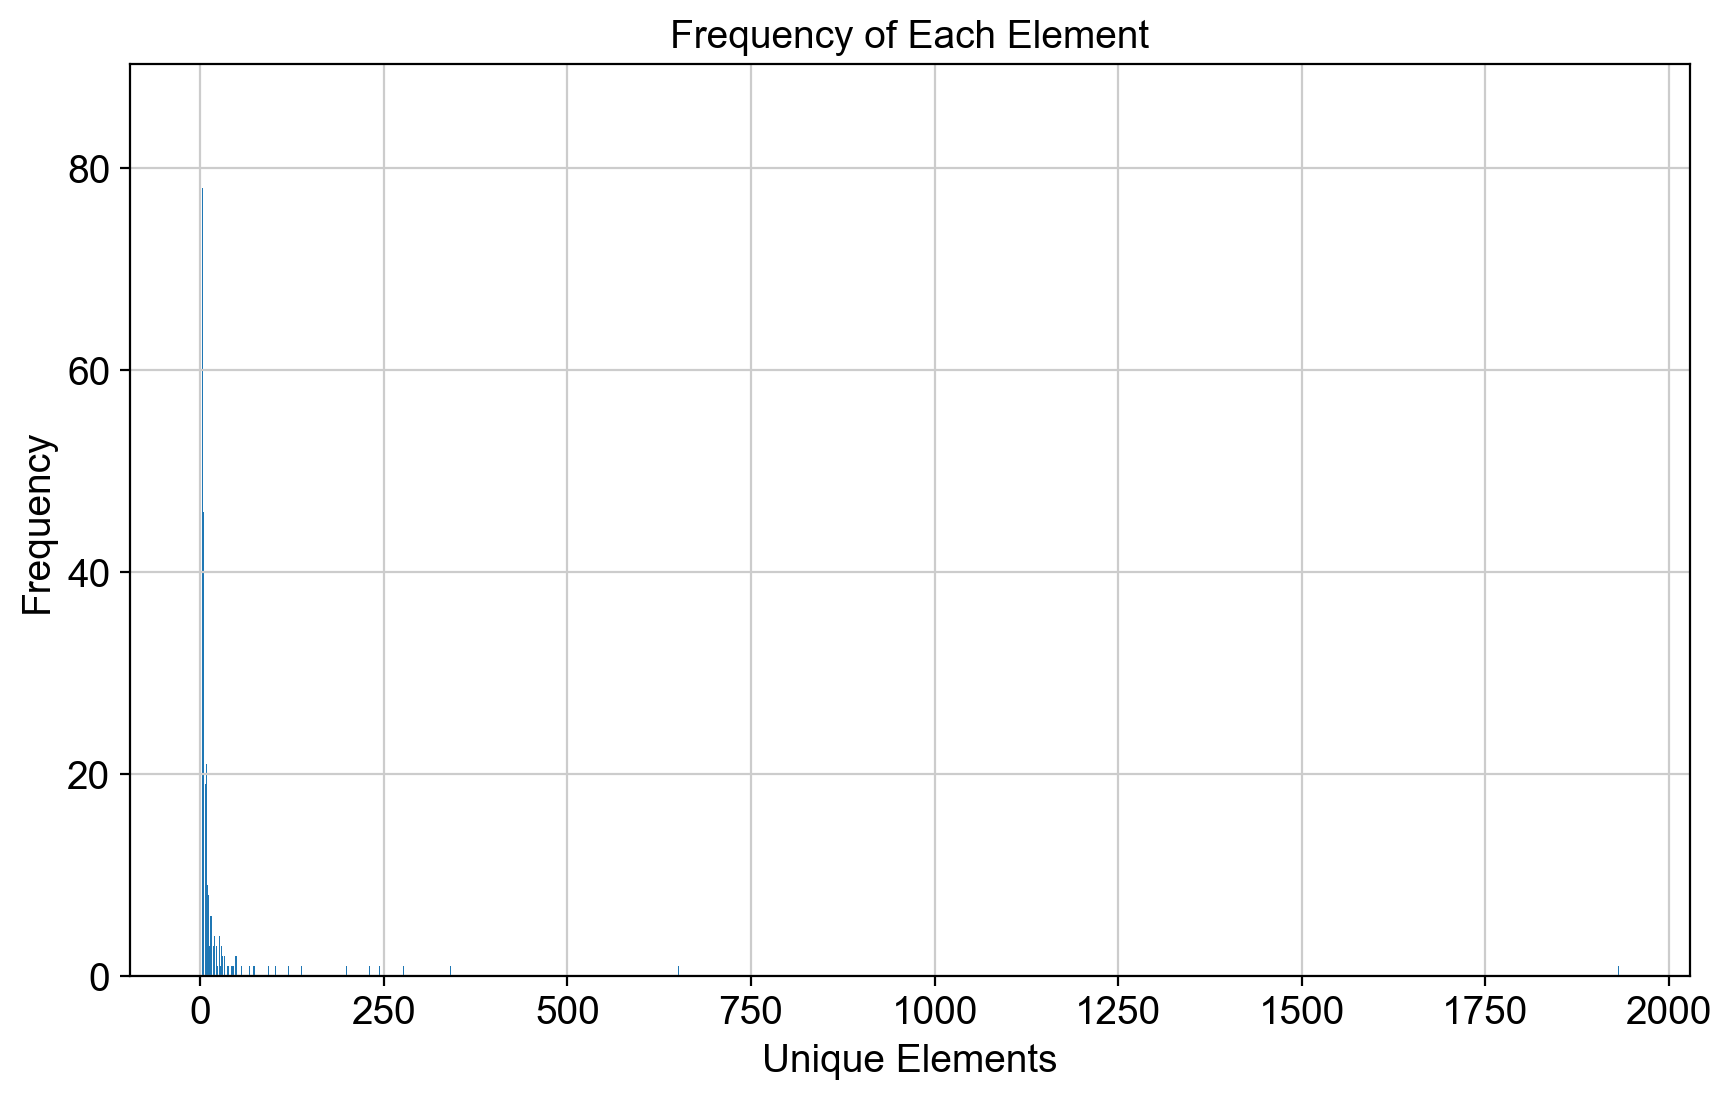

In [15]:
value_counts = adata.obs["CellTagD0_48k"].value_counts()
value_counts2 = value_counts.value_counts()

# Plotting
plt.figure(figsize=(10, 6))  # Increase figure size
plt.bar(value_counts2.index, value_counts2.values)
plt.xlabel('Unique Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Each Element')
plt.show()

In [16]:
value_counts2

count
2       86
1       82
3       78
5       47
4       46
        ..
42       1
32       1
38       1
945      1
1932     1
Name: count, Length: 65, dtype: int64

In [17]:
adata.write_h5ad(
    filename="biddy_full.h5ad"
)